In [2]:
import pandas as pd
from pymongo import MongoClient
import sklearn

MONGOHOST = "localhost:27017"
MONGODB = "lod_notebook"

client = MongoClient(MONGOHOST)
db_connect = client[MONGODB]

cur = db_connect["area_data"].find()
df = pd.DataFrame(list(cur))

In [38]:
# row, col
df.shape

(4107, 39)

In [3]:
# 数値データを人口割りする
df_pp = pd.DataFrame()
for k, v in df.iteritems():
    try:
        #集計結果を人口あたりの値に変換する。この値はseriesとして返る
        s = df[k].astype(float)/df.total.astype(float)
        df_pp[k] = s
    except:
        df_pp[k] = df[k]
    df_pp["total"] = df["total"]
    
#  村など病院数などの値が取得できない=NaNとなるデータを今回は含めないようにします
df_pp = df_pp[df_pp.m_byoin.notnull()]
# エリアコードをURLから単純な文字列部分のみに変更します。
df_pp["_id"] = df_pp["_id"].map(lambda x: x[33:-9])
#  標準地域コードで市町村区名の取得出来ないデータも今回は含めないようにします。
df_pp = df_pp[df_pp.city.notnull()]


In [53]:
df_pp.shape

(1907, 39)

In [20]:
# 全く関係ないけど人口の男性がしめる割合をソートしてみて見た
df_pp.loc[:, ["male","pref", "city","total"]].sort_values("male")

,male,pref,city,total
1441,0.421500,京都府,東山区,39312
1402,0.440468,福岡県,中央区,167270
2993,0.444948,和歌山県,古座川町,3088
72,0.446629,北海道,歌志内市,4375
124,0.447135,山口県,阿武町,3717
1065,0.447364,北海道,上ノ国町,5405
3864,0.448307,北海道,神恵内村,1122
1044,0.448315,高知県,奈半利町,3531
3908,0.448358,静岡県,熱海市,39348
2157,0.449571,北海道,上砂川町,4075


In [4]:
# dataのStandarizationのために文字列のカラムをソートして先頭にはずしておきます
df_pp = df_pp.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_pp.sort_index(axis=1, inplace=True)
df_pp.fillna(0, inplace=True)
#df_pp.ix[:,3:] 
df_pp.sort_index(axis=1, inplace=True)


In [5]:
# 数値データを標準化
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_pp.ix[:,3:] = scale.fit_transform(df_pp.ix[:,3:])

In [24]:
# データをMinMaxScalerで正規化した場合
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_pp.ix[:,3:] = mms.fit_transform(df_pp.ix[:,3:])

In [6]:
# areacodeをindexにセット
df_pp.set_index('_area', inplace=True)

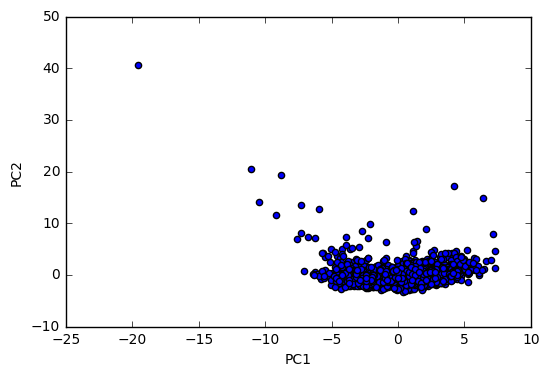

In [7]:
# 主成分分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(df_pp.ix[:,3:]), columns=('PC1', 'PC2'))
pca_df["area"] = df_pp.index
pca_df.plot(kind='scatter', x='PC1', y='PC2')

In [11]:
# dataframeをnumpy arrayへ変換。標準化した数値データのみ。
area_array = df_pp.ix[:,2:].as_matrix()

array([[-0.53070523, -0.85237478, -0.26110166, ...,  0.8553077 ,
        -0.22439146, -0.87978105],
       [-1.19036008,  0.17957566, -0.26110166, ..., -0.14372135,
        -0.03611012,  0.28880979],
       [-1.19036008, -1.48232624, -0.26110166, ...,  1.64213679,
        -0.20101667, -1.30890129],
       ..., 
       [-0.69223725, -0.79040913, -0.01373706, ...,  0.08265674,
         0.34952034, -0.00922902],
       [ 1.85068518,  2.38982179, -0.26110166, ...,  1.58930689,
        -0.23299997, -1.11815972],
       [ 1.27973196,  0.87654083, -0.26110166, ...,  2.47654968,
         0.23261035, -1.37658481]])

In [170]:
# k-measでクラスタリング。クラスタ数は１０。
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

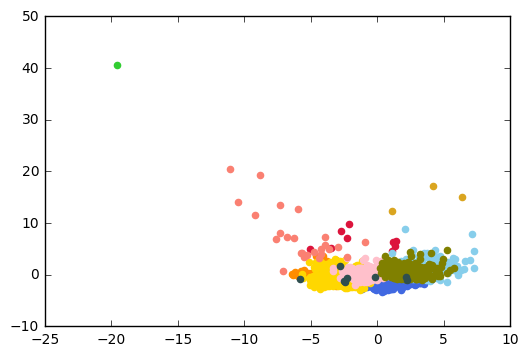

In [171]:
# PCAの結果をk-meansの結果でラベルしてプロット
import pylab as pl
pca0 = pca_df[k_means.labels_ == 0]
pca1 = pca_df[k_means.labels_ == 1]
pca2 = pca_df[k_means.labels_ == 2]
pca3 = pca_df[k_means.labels_ == 3]
pca4 = pca_df[k_means.labels_ == 4]
pca5 = pca_df[k_means.labels_ == 5]
pca6 = pca_df[k_means.labels_ == 6]
pca7 = pca_df[k_means.labels_ == 7]
pca8 = pca_df[k_means.labels_ == 8]
pca9 = pca_df[k_means.labels_ == 9]
pca10 = pca_df[k_means.labels_ == 10]
pca11 = pca_df[k_means.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

In [ ]:
# ラベルしたデータ（array）をデータフレームに追加。
# area_name.jsonがdict型なので、参照しやすいようにこれに追加して出力する


In [163]:
df_ori = df
df_ori = df_ori.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_ori["_area"] = df_ori["_area"].map(lambda x: x[33:-9])
df_ori.set_index('_area', inplace=True)
df_ori = df_ori[df_ori.m_byoin.notnull()]
df_ori.fillna("-", inplace=True)
df_ori.to_json('data/area_data_36.json', orient='index', force_ascii=False)

#df_pp.ix[:, :2].to_json('data/area_name.json', orient='index', force_ascii=False)
pca_df.to_json('data/pca_36.json', orient='records')

#  都道府県名、市町村区名のdataframeを生成し、さらにk-means.labels_のカラムを追加する。
area_dict = df_pp.ix[:, :2]
area_dict['label'] =k_means.labels_
area_dict.to_json('data/area_name.json', orient='index', force_ascii=False)